# Using `pyide` with the Ricker growth function and Gaussian dispersal

This notebook shows how to use the `pyide` module to simulate an integro-difference equation with Ricker growth and Gaussian dispersal. The Ricker growth function is given by

$$ g(u) = u e^{r\left(1-\frac{u}{K}\right)} $$

Here, $r$ is the rate of growth and $K$ is the carrying capacity of the environment. We will assume $K=1$.

In [1]:
import PyIDE
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

from imp import reload # for debugging

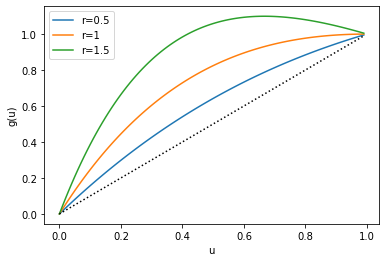

In [71]:
#k=1

def ricker(r):
    return lambda u : u * np.exp(r*(1-u))


def plot_ricker_functions():
    
    # fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
    fig,axs = plt.subplots()
    growthFunction = PyIDE.RickerGrowthFunction(r=1)
    
    U = np.arange(0, 1, 0.01)
    
    for r in [.5,1,1.5]:
        growthFunction.set_parameter(r, 1)
        g = growthFunction.g
        axs.plot(U, g(U), label="r="+str(r))
    
    axs.legend()
    
    axs.plot(U,U, color="black", linestyle=":")
    
    axs.set_xlabel("u")
    
    axs.set_ylabel("g(u)")
plot_ricker_functions()

In [72]:
reload(PyIDE)

<module 'PyIDE' from 'C:\\Users\\vilim\\Documents\\integro-difference\\integro-difference\\PyIDE.py'>

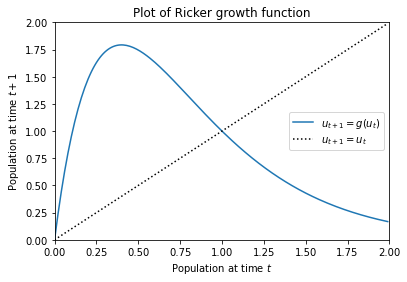

In [4]:
RickerGrowth = PyIDE.GrowthFunction(g=ricker(2.5))
RickerGrowth.show("Plot of Ricker growth function",
                  [0,2],[0,2])

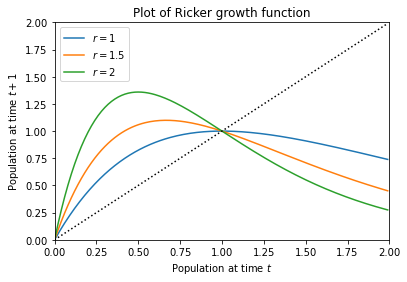

In [5]:
RickerGrowth = PyIDE.RickerGrowthFunction(r=2.5)
RickerGrowth.show_multiple("Plot of Ricker growth function",
                [0,2],[0,2], [1,1.5,2])

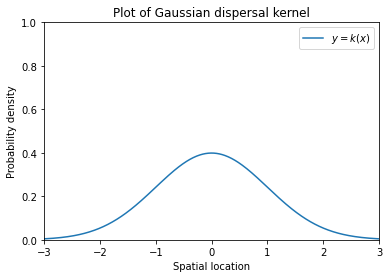

In [6]:
disperalKernel = PyIDE.GaussianDisperalKernel()

disperalKernel.show("Plot of Gaussian dispersal kernel",
                   [-3,3], [0,1], 0.01)

In [85]:
reload(PyIDE)

growthFunction = PyIDE.RickerGrowthFunction(r=1)

disperalKernel = PyIDE.GaussianDisperalKernel()

model = PyIDE.IDEModel(growthFunction,
                  disperalKernel)

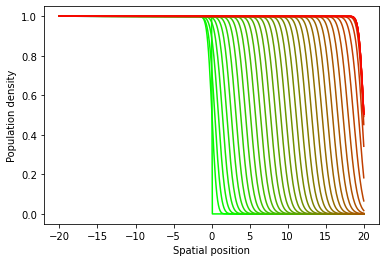

In [86]:
u0 = lambda x : np.heaviside(-x, 1)

sim = PyIDE.IDESimulation(model)

sim.setDomain(-20, 20, 0.1)
sim.setInitialCondition(u0)
sim.setBoundaryCondition("dynamic")


sim.run(40)
sim.plot()

In [ ]:
h = lambda x : np.heaviside(x, 1)

u0 = lambda x : np.heaviside(-x, 1)

model.set_initial_density(u0)

model.run(time_steps=50)

In [ ]:
model.plot(times = np.arange(10,40))

In [ ]:
np.arange(5)

In [ ]:
h = lambda x : np.heaviside(x, 1)
a = 0.3

ricker = lambda u : u * h(u-a) * np.exp(1-u)

model = ide(g = ricker,
            k = norm.pdf,
            xmin=-20, xmax=20, dx=0.01)
            
u0 = lambda x : h(-x)

model.set_initial_density(u0)

model.run(time_steps=30)

model.plot()

In [ ]:
#def estimate_wavespeed(model, level, error):
wavefronts = [model.xmin + model.dx*max([i for i in range(len(model.seq[0])) if model.seq[j][i] > 0.1]) for j in range(len(model.seq))]
wavespeeds = [wavefronts[i+1]-wavefronts[i] for i in range(len(wavefronts)-1)]

In [ ]:
averages = [np.max(wavespeeds[i:]-np.mean(wavespeeds[i:])) for i in range(len(model.seq)-1)]
averages = [c for c in averages if c < 0.01]
averages

In [ ]:
model.xmin